In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import librosa
import numpy as np
from numpy import asarray
from numpy import save
import os
import random

In [3]:
base = '/content/drive/MyDrive/THESIS/LibriSpeech_testing_data'

In [4]:
def extract_features(file_name):
  
  print(file_name)
  audio, sample_rate = librosa.load(file_name, duration=2.97)
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccsscaled = np.mean(mfccs.T, axis=0)
    
  return mfccsscaled
    

In [ ]:
first_iteration = True

support_set_mfcc_scaled = np.zeros(40)
support_set_speaker_id = np.zeros(1, dtype=int)
query_set_mfcc_scaled = np.zeros(40)
query_set_speaker_id = np.zeros(1, dtype=int)

file_count = 1

for dirpath, dirnames, files in os.walk(base):
  
  # Giving the file_count condition to pick total number of speakers/classes 
  # in the support set and query set.
  if (file_count <= 4):

    new_speaker = True

    ## Just ignoring the first iteration because, we do not need the base path's
    ## files. we need the base path's directory's(speaker's) audio files.
    if first_iteration: 
      first_iteration = False
      continue

    speaker_id = ''
    forSupportSet = True

    count = 1
    while (count <= 26):

      random_file = random.choice(files)
      
      ## This checking is for taking the speaker_id only once for a speaker
      ## rather than picking the speaker_id for each audiofiles of the same speaker
      if new_speaker:
        speaker_id = random_file.split('-')[0]
        new_speaker = False

      if forSupportSet:
        support_set_speaker_id = np.vstack([support_set_speaker_id, speaker_id])
        support_set_mfcc_scaled = np.vstack([support_set_mfcc_scaled, extract_features(os.path.join(*[base, speaker_id, random_file]))])
        forSupportSet = False
      
      else:
        query_set_speaker_id = np.vstack([query_set_speaker_id, speaker_id])
        query_set_mfcc_scaled = np.vstack([query_set_mfcc_scaled, extract_features(os.path.join(*[base, speaker_id, random_file]))])

      count += 1

  file_count += 1

## Removing the 1st row from support, and query samples' feature vectors because of zero value
support_set_mfcc_scaled = np.delete(support_set_mfcc_scaled, 0, axis=0)
query_set_mfcc_scaled = np.delete(query_set_mfcc_scaled, 0, axis=0)

## Removing the 1st row of support set's and query set's speaker_id array because of zero value
support_set_speaker_id = np.delete(support_set_speaker_id, 0, axis=0)
query_set_speaker_id = np.delete(query_set_speaker_id, 0, axis=0)

/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0026.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0023.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0022.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0001.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0035.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0026.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0032.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0005.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0037.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0044.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0014.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0020.flac
/content/drive/M

In [ ]:
support_set_speaker_id

array([['1580'],
       ['1221'],
       ['1089'],
       ['2094']], dtype='<U21')

In [ ]:
query_set_speaker_id

array([['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1580'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1221'],
       ['1089'],
       ['1089'],
       ['1089'],
       ['1089'],
       ['1089'],
       ['1089'],
       ['1089'],
       ['1089'],
       ['1089'

In [ ]:
# Saving the support_set sample arrray to .npy format
support_set_mfcc_scaled_array = asarray(support_set_mfcc_scaled)
save('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/test/support_set_4.npy', support_set_mfcc_scaled_array)

In [ ]:
# Saving the query_set sample arrray to .npy format
query_set_mfcc_scaled_array = asarray(query_set_mfcc_scaled)
save('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/test/query_set_4.npy', query_set_mfcc_scaled_array)

In [ ]:
support_set_speaker_id_array = asarray(support_set_speaker_id)
save('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/test/support_set_speaker_id_4.npy', support_set_speaker_id_array)

In [ ]:
query_set_speaker_id_array = asarray(query_set_speaker_id)
save('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/test/query_set_speaker_id_4.npy', query_set_speaker_id_array)

In [69]:
first_iteration = True

tsne_array = np.zeros(40)
support_set_speaker_id = np.zeros(1, dtype=int)

file_count = 1

for dirpath, dirnames, files in os.walk(base):

  if (file_count <= 10):

    new_speaker = True
  
    if first_iteration: 
        first_iteration = False
        continue

    speaker_id = ''

    count = 1
    while (count <= 20):

        random_file = random.choice(files)
    
        if new_speaker:
            speaker_id = random_file.split('-')[0]
            new_speaker = False

        if speaker_id not in ['2300','1320','1089','1284']:
            
            support_set_speaker_id = np.vstack([support_set_speaker_id, speaker_id])
            tsne_array = np.vstack([tsne_array, extract_features(os.path.join(*[base, speaker_id, random_file]))])

        count += 1

    file_count += 1

## Removing the 1st row from support, and query samples' feature vectors because of zero value
tsne_array = np.delete(tsne_array, 0, axis=0)
support_set_speaker_id = np.delete(support_set_speaker_id, 0, axis=0)

/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0035.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0053.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0033.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0010.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0021.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0009.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0049.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0031.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0031.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0013.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0003.flac
/content/drive/MyDrive/THESIS/LibriSpeech_testing_data/1580/1580-141083-0030.flac
/content/drive/M

In [70]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd 

In [71]:
np.unique(support_set_speaker_id)
# support_set_speaker_id.size


array(['1188', '121', '1221', '1580', '1995', '2094'], dtype='<U21')

In [72]:
support_set_speaker_id.shape

(120, 1)

In [73]:
a = [1580]*20
a += [1221]*20
# a += [1089]*10
a += [2094]*20
# a += [1320]*10
a += [1995]*20
a += [121]*20
# a += [1284]*10
a += [1188]*20
# a += [2300]*10
print(a)

[1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1580, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 2094, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 39.796068
[t-SNE] KL divergence after 250 iterations with early exaggeration: 7.930647
[t-SNE] KL divergence after 1000 iterations: 0.107673


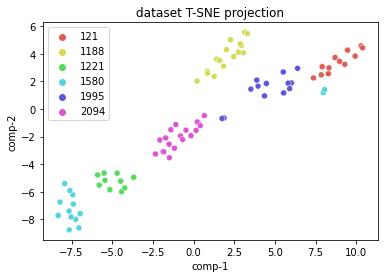

In [86]:
# tsne-plot
# tsne_array = tsne_array[:80,:]
tsne = TSNE(n_components=2, early_exaggeration=3.5, verbose=1, random_state=143)
z = tsne.fit_transform(tsne_array)
df = pd.DataFrame()
df["y"] = a
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title="dataset T-SNE projection")